In [118]:
#This is the problem Statement no-2(Titanic problem) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.sample(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
254,255,0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q
651,652,1,2,"Doling, Miss. Elsie",female,18.0,0,1,231919,23.0000,NaN,S
609,610,1,1,"Shutes, Miss. Elizabeth W",female,40.0,0,0,PC 17582,153.4625,C125,S
776,777,0,3,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.7500,F38,Q
395,396,0,3,"Johansson, Mr. Erik",male,22.0,0,0,350052,7.7958,NaN,S
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S
576,577,1,2,"Garside, Miss. Ethel",female,34.0,0,0,243880,13.0000,NaN,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
706,707,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5000,NaN,S


In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data.shape

(891, 12)

In [ ]:
#In this data there are 891 rows and 12 columns are present in which one is target variable(label)
#By studying the data we clearly understand that it is a classfication based problem in which we have to predict whether the 
#person survived or not.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
#we have checked their data types.

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#There are nulls present in 'Age','Cabin'and 'embarked'
#so we will treat nulls first of age and embarked but in cabin there are so much nulls so we will drop the column.

In [14]:
data['Age'].fillna(data.groupby('Sex')['Age'].transform('mean'),inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.915709,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [15]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#we have treated the nulls of 'Age'by their average of male and female.

In [16]:
data.drop('Cabin',axis=1,inplace=True)

In [40]:
for i in data.columns:
    print(data[i].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Sex
1    577
0    314
Name: count, dtype: int64
Age
30.726645    124
27.915709     53
24.000000     30
22.000000     27
18.000000     26
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: count, Length: 90, dtype: int64
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64
Embarked
0    646
1    168
2     77
Name: count, dtype: int64


In [17]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
data['Embarked'].fillna(value=data['Embarked'].mode()[0],inplace=True)

In [19]:
data.sample(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
352,353,0,3,"Elias, Mr. Tannous",male,15.000000,1,1,2695,7.2292,C
188,189,0,3,"Bourke, Mr. John",male,40.000000,1,1,364849,15.5000,Q
784,785,0,3,"Ali, Mr. William",male,25.000000,0,0,SOTON/O.Q. 3101312,7.0500,S
320,321,0,3,"Dennis, Mr. Samuel",male,22.000000,0,0,A/5 21172,7.2500,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.000000,1,6,CA 2144,46.9000,S
460,461,1,1,"Anderson, Mr. Harry",male,48.000000,0,0,19952,26.5500,S
89,90,0,3,"Celotti, Mr. Francesco",male,24.000000,0,0,343275,8.0500,S
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,27.915709,0,1,113505,55.0000,S
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.000000,0,1,111361,57.9792,C
778,779,0,3,"Kilgannon, Mr. Thomas J",male,30.726645,0,0,36865,7.7375,Q


In [20]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
#All the nulls have now been treated.
#we will drop 'PassengerId column 'also it is of no use

In [22]:
data.drop('PassengerId',axis=1,inplace=True)

In [23]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.736034,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.014897,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#There is a little bit skewness is present in case of 'Fare' because there is differnece between mean and median 
#The difference between 75% and max is high there might be a outliers.
#Now we will drop name and ticket column because they are of no use.

In [25]:
data.drop(['Name','Ticket'],axis=1,inplace=True)

In [26]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#Now we replace encode the 'Sex'and 'Embarked'features

In [28]:
data['Sex'].replace({'male':1,'female':0},inplace=True)

In [29]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,S
1,1,1,0,38.000000,1,0,71.2833,C
2,1,3,0,26.000000,0,0,7.9250,S
3,1,1,0,35.000000,1,0,53.1000,S
4,0,3,1,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,S
887,1,1,0,19.000000,0,0,30.0000,S
888,0,3,0,27.915709,1,2,23.4500,S
889,1,1,1,26.000000,0,0,30.0000,C


In [31]:
data['Embarked'].replace({'S':0,'C':1,'Q':2},inplace=True)

In [32]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,0
1,1,1,0,38.000000,1,0,71.2833,1
2,1,3,0,26.000000,0,0,7.9250,0
3,1,1,0,35.000000,1,0,53.1000,0
4,0,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0
887,1,1,0,19.000000,0,0,30.0000,0
888,0,3,0,27.915709,1,2,23.4500,0
889,1,1,1,26.000000,0,0,30.0000,1


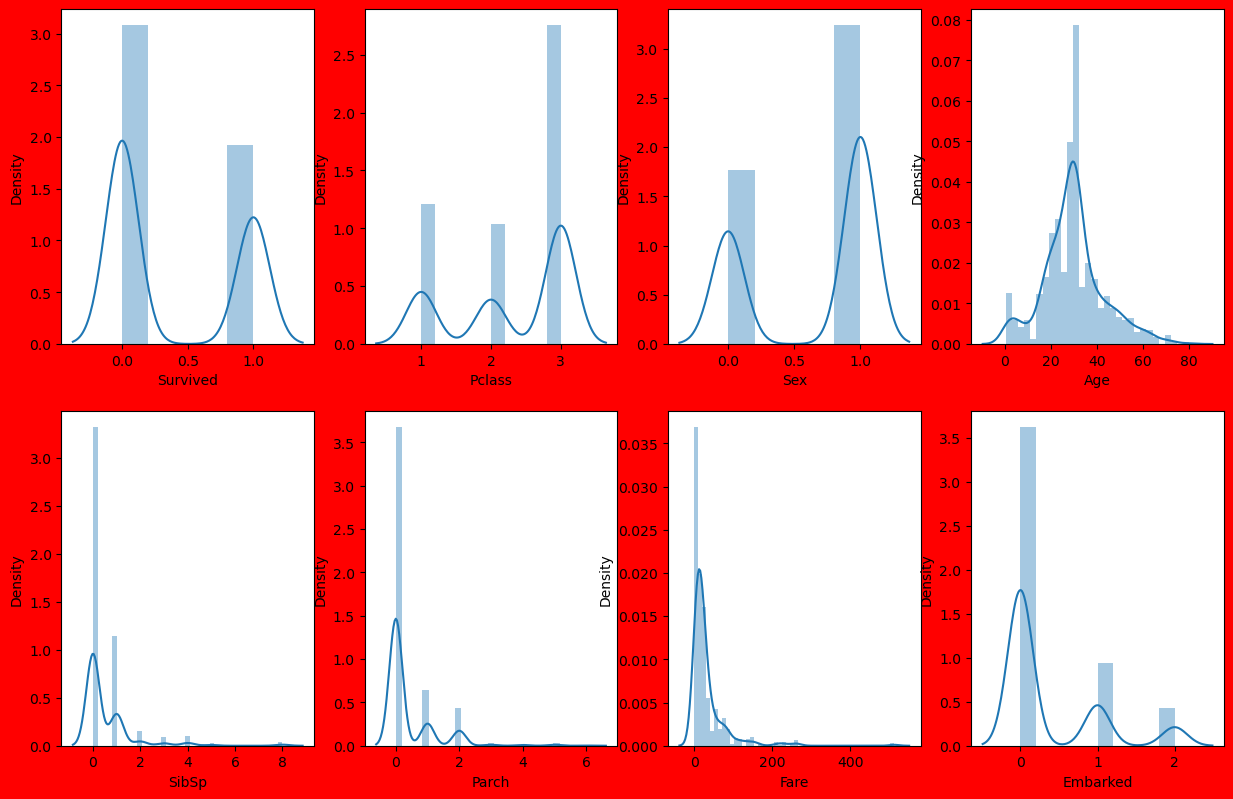

In [36]:
plt.figure(figsize=(15,20),facecolor='Red')
plotnumber=1
for colu in data:
    if plotnumber<=9:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[colu])
        plt.xlabel(colu,fontsize=10)
    plotnumber+=1
plt.show()    

In [ ]:
#after studying the graph there is a skewness present in 'SibSp','Parch','Fare' columns.
#Now we will check for otliers by plotting the boxplot
#we will check for skewness also

In [37]:
data.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.424586
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked    1.543397
dtype: float64

In [ ]:
#now we will remove skewness of Fare because rest are categorical data.

In [44]:
data['Fare']=np.cbrt(data['Fare'])

In [45]:
data.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.424586
SibSp       3.695352
Parch       2.749117
Fare       -2.950107
Embarked    1.543397
dtype: float64

In [ ]:
#now the skewness has been treated now we will check for outliers.


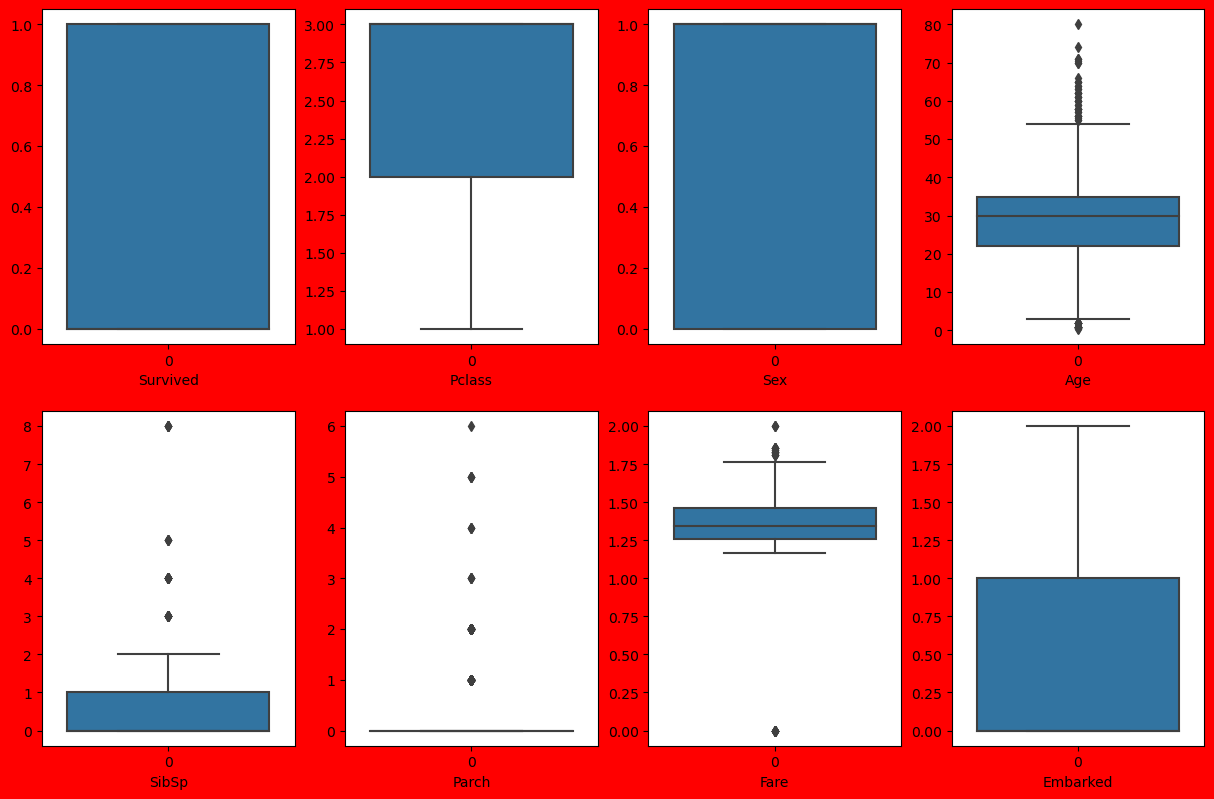

In [46]:
plt.figure(figsize=(15,20), facecolor="Red")
plotnumber=1
for col in data:
    if plotnumber<=9:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(data[col])
        plt.xlabel(col,fontsize=10)
    plotnumber+=1 
plt.show()    
    

In [47]:
#There are outliers present in the data now we will remove outliers of 'Fare' features.

In [48]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1

In [50]:
Fare_high=q3['Fare']+1.5*iqr['Fare']
Fare_high

1.7738797411687695

In [51]:
np_index=np.where(data['Fare']>Fare_high)
np_index

(array([ 27,  88, 118, 258, 299, 311, 341, 377, 380, 438, 527, 557, 679,
        689, 700, 716, 730, 737, 742, 779], dtype=int64),)

In [52]:
data=data.drop(data.index[np_index])
data.shape

(871, 8)

In [53]:
data.reset_index()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.000000,1,0,1.246215,0
1,1,1,1,0,38.000000,1,0,1.606525,1
2,2,1,3,0,26.000000,0,0,1.258603,0
3,3,1,1,0,35.000000,1,0,1.554809,0
4,4,0,3,1,35.000000,0,0,1.260794,0
...,...,...,...,...,...,...,...,...,...
866,886,0,2,1,27.000000,0,0,1.329755,0
867,887,1,1,0,19.000000,0,0,1.459233,0
868,888,0,3,0,27.915709,1,2,1.419836,0
869,889,1,1,1,26.000000,0,0,1.459233,1


In [54]:
Fare_low=q1['Fare']-1.5*iqr['Fare']
Fare_low

0.9490242773927622

In [55]:
np_inde=np.where(data['Fare']<Fare_low)
np_inde

(array([176, 259, 267, 273, 297, 404, 456, 471, 585, 621, 662, 715, 786,
        795, 802], dtype=int64),)

In [56]:
data=data.drop(data.index[np_inde])
data.shape

(856, 8)

In [57]:
data.reset_index()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.000000,1,0,1.246215,0
1,1,1,1,0,38.000000,1,0,1.606525,1
2,2,1,3,0,26.000000,0,0,1.258603,0
3,3,1,1,0,35.000000,1,0,1.554809,0
4,4,0,3,1,35.000000,0,0,1.260794,0
...,...,...,...,...,...,...,...,...,...
851,886,0,2,1,27.000000,0,0,1.329755,0
852,887,1,1,0,19.000000,0,0,1.459233,0
853,888,0,3,0,27.915709,1,2,1.419836,0
854,889,1,1,1,26.000000,0,0,1.459233,1


In [58]:
#the ouliers are removed

In [59]:
corr=data.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.343258,-0.531513,-0.079126,-0.046180,0.075812,0.316781,0.095936
Pclass,-0.343258,1.000000,0.126495,-0.339845,0.091324,0.047692,-0.743256,0.057345
Sex,-0.531513,0.126495,1.000000,0.101623,-0.105634,-0.246710,-0.241937,-0.109196
Age,-0.079126,-0.339845,0.101623,1.000000,-0.233187,-0.194591,0.126779,0.003172
SibSp,-0.046180,0.091324,-0.105634,-0.233187,1.000000,0.407120,0.342199,-0.061385
Parch,0.075812,0.047692,-0.246710,-0.194591,0.407120,1.000000,0.317524,-0.085778
Fare,0.316781,-0.743256,-0.241937,0.126779,0.342199,0.317524,1.000000,-0.038540
Embarked,0.095936,0.057345,-0.109196,0.003172,-0.061385,-0.085778,-0.038540,1.000000


In [ ]:
#now we will check for Vif values


In [61]:
x=data.drop('Survived',axis=1)
y=data['Survived']



In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.linear_model import LogisticRegression

In [68]:
Scalar=StandardScaler()
Xscaled=Scalar.fit_transform(x)
Xscaled.shape[1]

(856, 7)

In [69]:
vif=pd.DataFrame()
vif['vifvalues']=[variance_inflation_factor(Xscaled,i) for i in range(Xscaled.shape[1])]
vif['features']=x.columns

In [70]:
vif

,vifvalues,features
0,3.836841,Pclass
1,1.136296,Sex
2,1.218630,Age
3,1.680365,SibSp
4,1.480384,Parch
5,4.320187,Fare
6,1.041474,Embarked


In [ ]:
#All the vif values are less than 5 so it means that there is not multicollinearity.

In [ ]:
#All the preprocessing steps are completed now model building.

In [71]:
x_train,x_test,y_train,y_test=train_test_split(Xscaled,y,test_size=0.25,random_state=200)

In [98]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print(f"Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train==False:
        pred=clf.predict(x_test)
        print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
        print(classification_report(y_test,pred,digits=2))
        

In [99]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [101]:
metric_score(LR,x_train,x_test,y_train,y_test,train=True)

metric_score(LR,x_train,x_test,y_train,y_test,train=False)

Accuracy score:79.75%
Accuracy score:81.78%
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       123
           1       0.83      0.71      0.77        91

    accuracy                           0.82       214
   macro avg       0.82      0.80      0.81       214
weighted avg       0.82      0.82      0.82       214



In [102]:
#Train result=79.75%
#test result=81.78%

In [ ]:
#Now we will build another model -Knn

In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
Knn=KNeighborsClassifier()
Knn.fit(x_train,y_train)

KNeighborsClassifier()

In [107]:
metric_score(Knn,x_train,x_test,y_train,y_test,train=True)

metric_score(Knn,x_train,x_test,y_train,y_test,train=False)

Accuracy score:85.51%
Accuracy score:83.64%
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       123
           1       0.84      0.76      0.80        91

    accuracy                           0.84       214
   macro avg       0.84      0.83      0.83       214
weighted avg       0.84      0.84      0.84       214



In [108]:
#train result=85.51%
#Test result=83.64%

In [109]:
#NOW we will try to increase the accuracy by GridSearchCV

In [110]:
from sklearn.model_selection import GridSearchCV

In [112]:
param_grid={'algorithm':['Kd tree','brute'],
           'leaf_size':[3,5,6,7,8],
           'n_neighbors':[3,5,7,9,11,13]}

In [113]:
gridsearch=GridSearchCV(estimator=Knn,param_grid=param_grid)
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['Kd tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [114]:
gridsearch.best_score_

0.8129723837209302

In [115]:
gridsearch.best_estimator_

KNeighborsClassifier(algorithm='brute', leaf_size=3, n_neighbors=13)

In [ ]:
#our result is accurate no change maximum accuracy is achieved

In [116]:
import pickle
filename='data_LR.pkl'
pickle.dump(LR, open(filename,'wb'))

In [125]:
#Problem statement no-1

In [136]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [137]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [138]:
df['Region'].value_counts()

Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64

In [139]:
df.shape

(158, 12)

In [140]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [141]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [142]:
df.drop(["Country", "Region", "Happiness Rank"], axis=1, inplace=True)

In [143]:
df.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


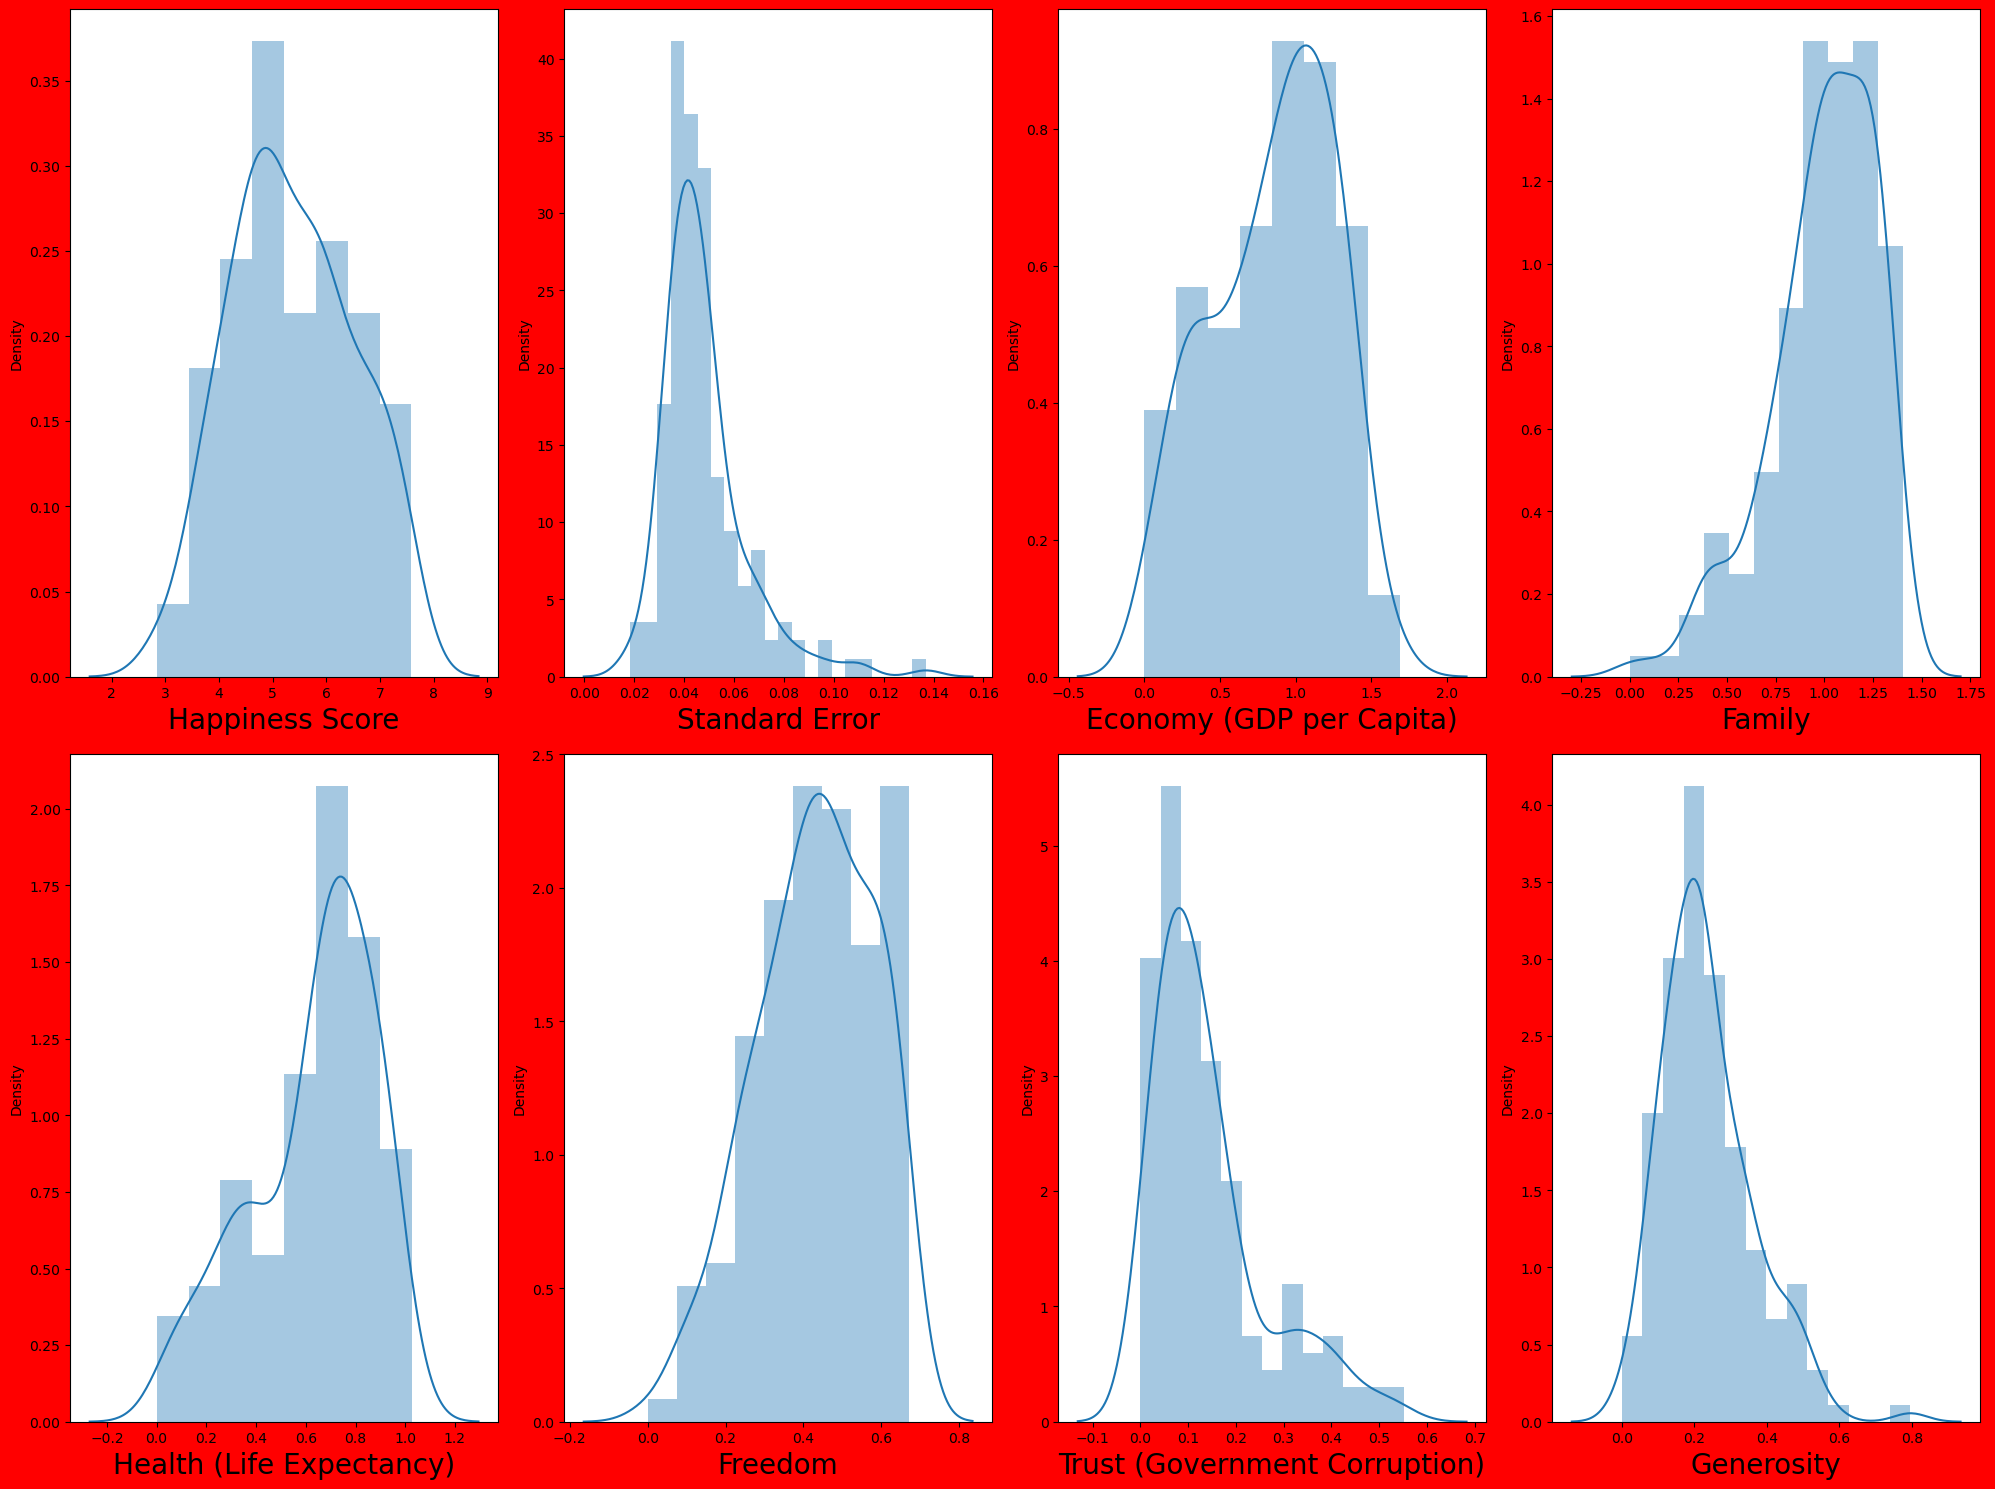

In [147]:
plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1
for column in df:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [148]:
y=df['Happiness Score']
x=df.drop(columns=['Happiness Score'])

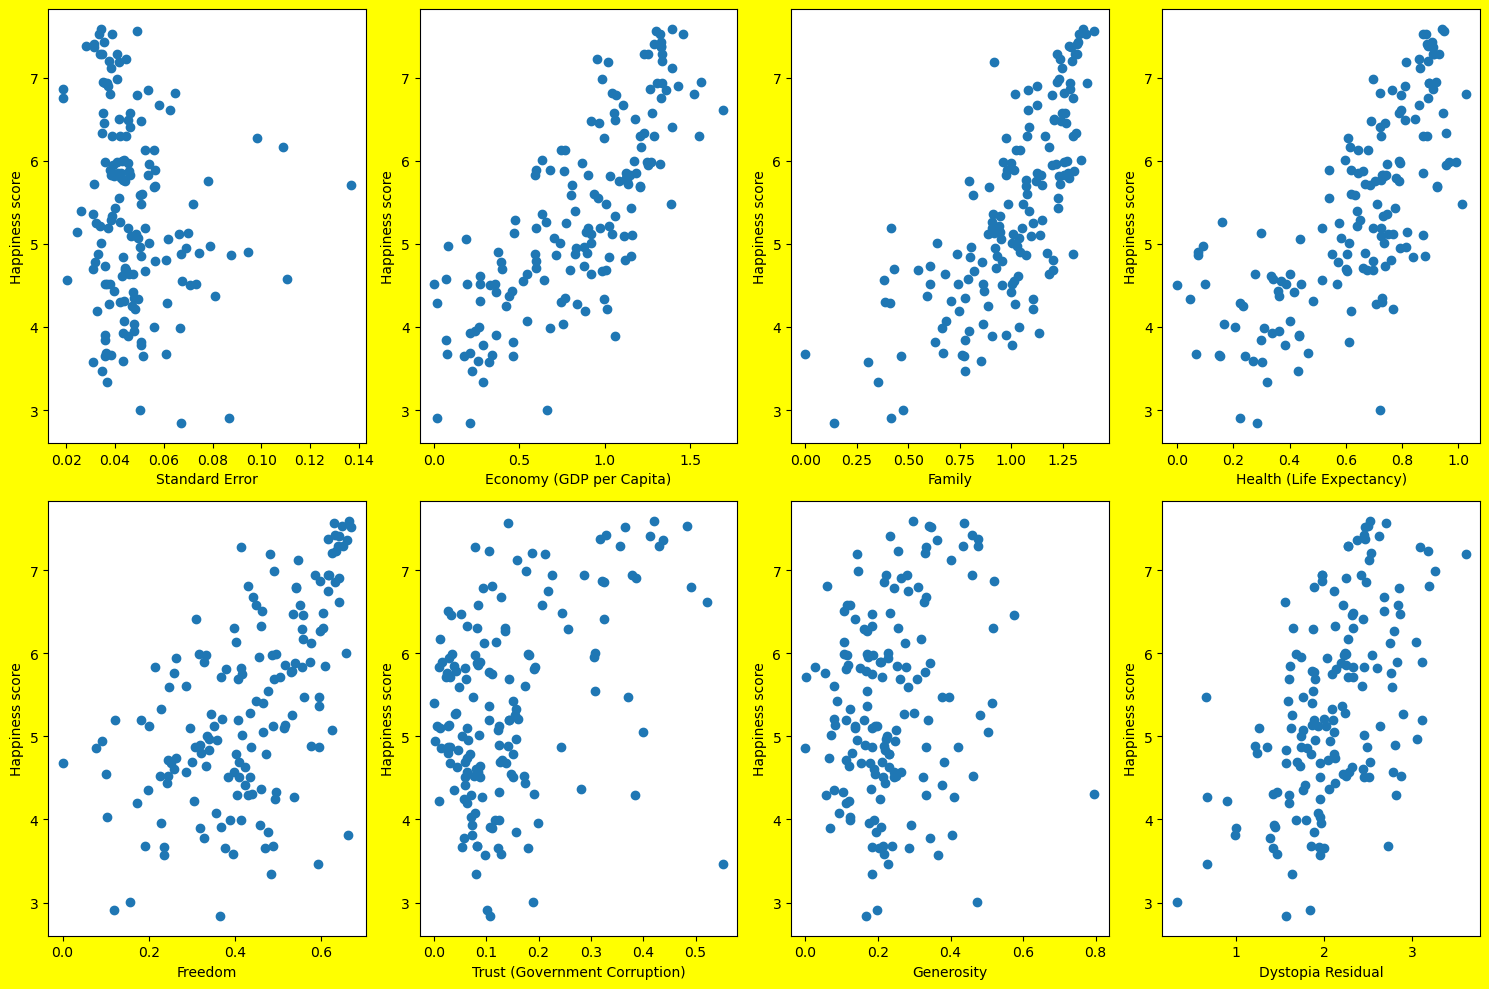

In [149]:
plt.figure(figsize=(15,10), facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=8:
        ax=plt.subplot(2,4, plotnumber)
        plt.scatter(x[column], y)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Happiness score', fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [150]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)

In [151]:
x_train, x_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.25, random_state=112)

In [153]:
from sklearn.linear_model import LinearRegression

In [155]:
regression=LinearRegression()

In [156]:
regression.fit(x_train, y_train)

LinearRegression()

In [157]:
regression.score(x_train, y_train)

0.9999999464243313

In [158]:
regression.score(x_test, y_test)


0.9999999211459927

In [159]:
x_test[1]

array([-0.72050477,  0.30052226,  1.00916467,  0.43947621,  0.85227797,
       -0.93228971,  2.684474  ,  0.39955621])

In [160]:
y_pred=regression.predict(x_test)
y_pred

array([5.19239166, 6.45461409, 5.81252785, 3.67785498, 5.14034882,
       4.83919584, 6.86716168, 6.12277718, 3.34001154, 7.42687008,
       5.77035541, 4.55065971, 6.13020845, 7.27769801, 5.01309092,
       4.68073744, 4.41928633, 3.58686892, 5.8897399 , 5.28635039,
       5.42852205, 6.90130877, 4.27057953, 5.98373987, 2.9046914 ,
       4.25197206, 5.19228711, 4.57156465, 5.84756058, 6.485099  ,
       4.50723688, 4.97123852, 5.82411932, 6.94615455, 4.3500116 ,
       4.51232884, 3.93078741, 5.79052594, 6.29471345, 5.47699165])

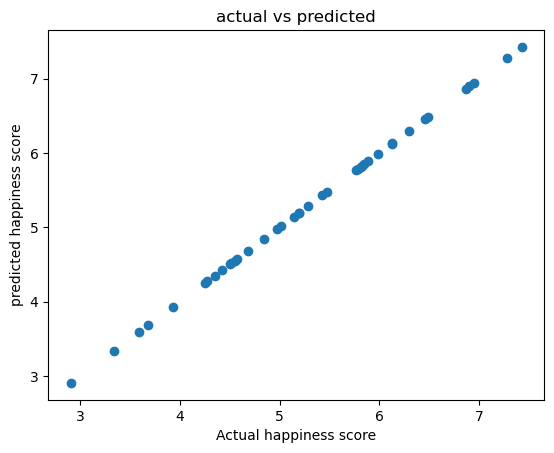

In [161]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual happiness score')
plt.ylabel('predicted happiness score')
plt.title('actual vs predicted')
plt.show()

In [ ]:
#99% accuracy achieved no need for hyperparameter tuning

In [162]:
import pickle
filename='data_LR.pkl'
pickle.dump(LR, open(filename,'wb'))